# Предмет - Схемотехніка радіотехнічних пристроїв

---
### Факти про дисципліну

Сторінка в СДН Moodle: https://eln.stu.cn.ua/course/view.php?id=4578

- Викладач: Пахалюк Богдан Петрович, аспірант

- Назва дисципліни: Схемотехніка радіотехнічних пристроїв.

- Мова викладання: українська.

- Обсяг дисципліни: 90 год (3 кредити ECTS).

- Лекцій – 16 (4) год.

- Лабораторних занять – 14 (8) год.

- Самостійна робота – 60 год.

- Підсумковий контроль – залік.

- Індивідуальне завдання – РГР.

In [1]:
from sympy import *
from sympy import symbols, Matrix
from sympy.plotting.plot import MatplotlibBackend, Plot
import matplotlib.pyplot as plt
import numpy as np
from ipywidgets import interact, interactive, fixed
import ipywidgets as widgets
%matplotlib inline

import math
import numpy as np
from engineering_notation import EngNumber
import matplotlib.pyplot as plt
from matplotlib.widgets import Cursor
from matplotlib.pyplot import semilogx
from matplotlib import pyplot
%matplotlib inline

import PySpice.Logging.Logging as Logging
logger = Logging.setup_logging()

from PySpice.Doc.ExampleTools import find_libraries
from PySpice.Probe.Plot import plot
from PySpice.Spice.Library import SpiceLibrary
from PySpice.Spice.Netlist import Circuit
from PySpice.Unit import *

## **Розділ 1** - Основні відомості про підсилювачі


### Параметри та характеристики підсилювачів. Основні визначення та класифікація.

**Підсилення** - процес збільшення потужності сигналу при відносному збереженні інформації, що міститься в ньому.

**Сигнал** - електромагнітна енергія, що несе інформацію.

**Принцип посилення** - передача потужності від джерела живлення в навантаження. Передачу цієї потужності здійснюють відповідно до вхідного сигналу.

Будь-яке підсилення супроводжується спотворенням.

**Спотворення** - це втрата частини інформації сигналу або поява нової інформації в сигналі.

Підсилювачі класифікуються:

1. За частотним діапазоном:

   A. **Підсилювачі постійного струму (ППС)**. Для них залежність коефіцієнта підсилення від частоти матиме вигляд (рисунок 1):  Рисунок1 ППС підсилює по постійному струму від нульової частоти до $f_{в}$ . З цього підсилювача можна отримати всі інші типи підсилювачів.
 
 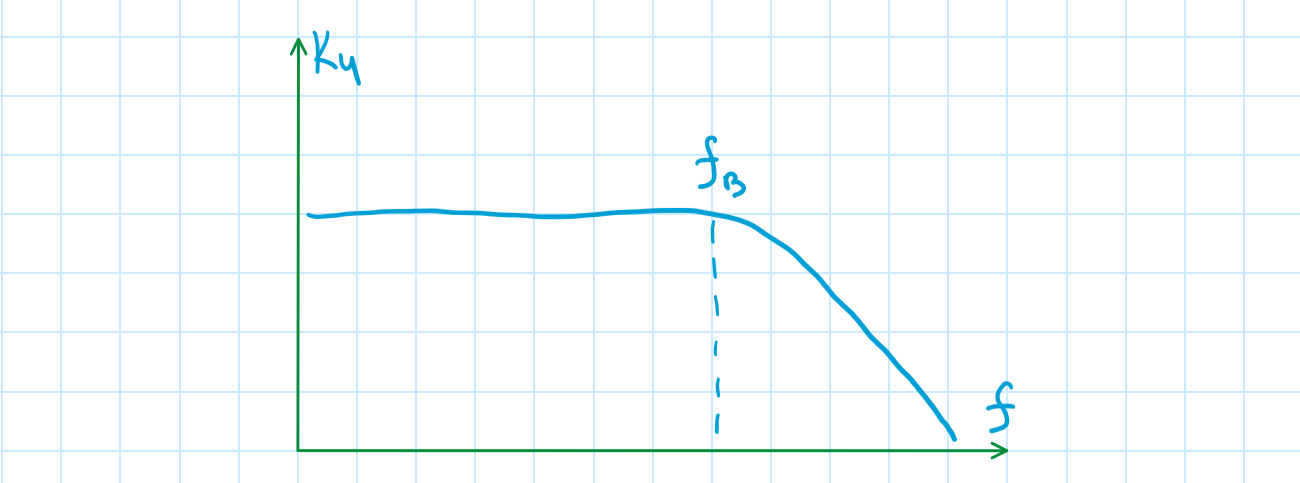
 <center> Рисунок 1 </center>

   B. **Підсилювачі змінної напруги (ПЗН)**.  Підсилює в смузі частот від $f_н$ до $f_в$, з порівняно однаковим коефіцієнтом підсилення. Як видно з рисунок 2, для нього характерна умова $f_{н} \neq 0$ і $f_{в}>>f_{н}$. Рисунок2 З ППС можна досить просто отримати ПЗН, а навпаки проблематично але можливо.
 
 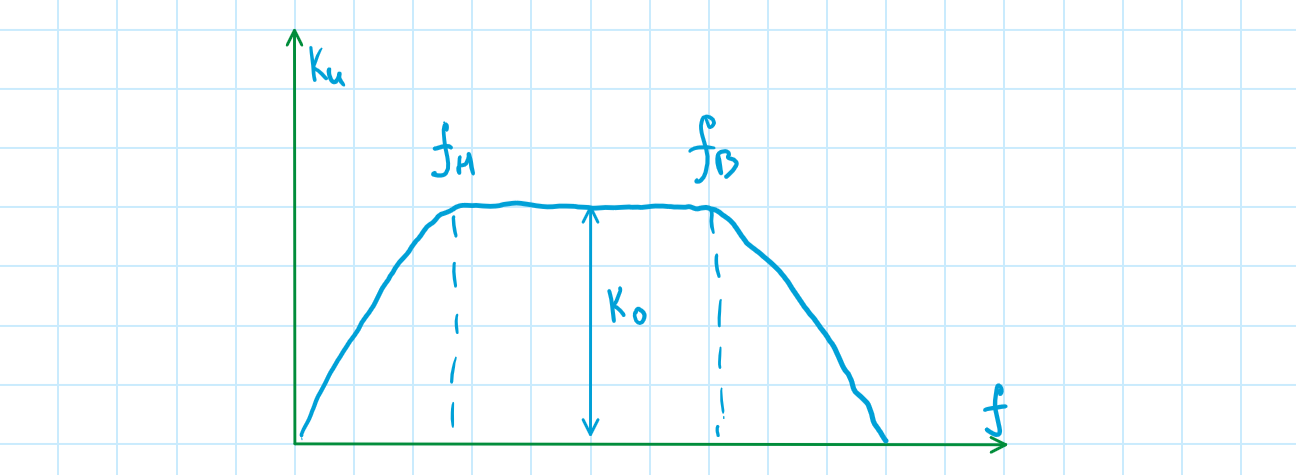
<center> Рисунок 2 </center>

   C. **Підсилювачі високої частоти (ПВЧ) або резонансні підсилювачі**  Рисунок3 З рисунка3 видно, що $f_{н} \approx f_{в} > 100 кГц$.
 
 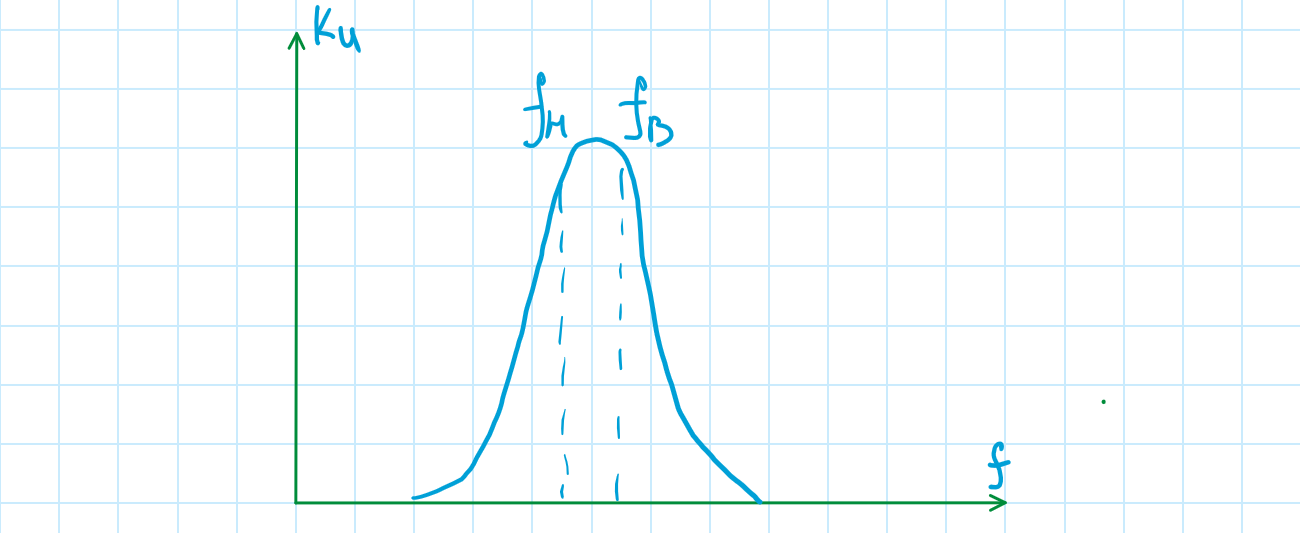
<center> Рисунок 3 </center>

2. За типом підсилюваних сигналів: 
      
      A. підсилювачі безперервних сигналів;
      
      B. підсилювачі імпульсних сигналів.
    
Перший тип часто називають - вузькосмуговими підсилювачами, для них не нормується фазова характеристика, тоді відповідно форма вихідного і вхідного сигналу почнуть відрізнятися за рахунок фазових зрушень. Це і є основне посилення в аналогових пристроях. 

Другий тип не повинен вносити фазових спотворень у підсилюваний сигнал. Цей тип називають широкосмуговими підсилювачами.

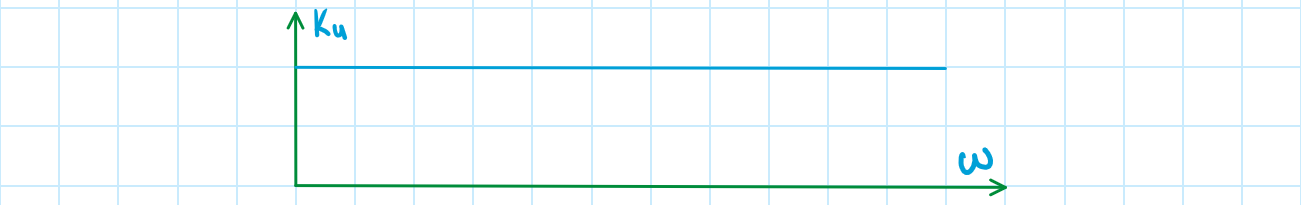

<center> Рисунок 4 </center>

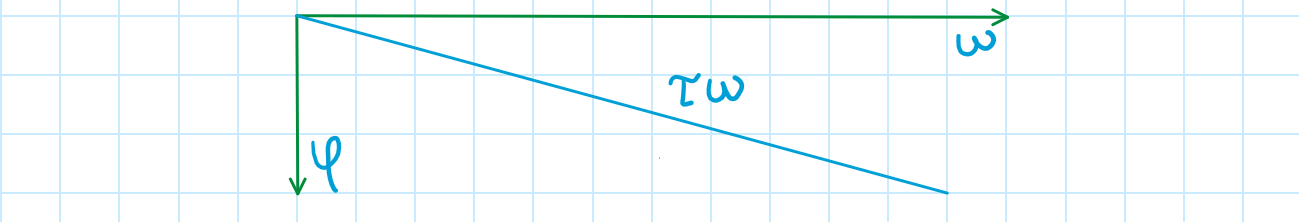

<center> Рисунок 5 </center>

$\omega$ - циклічна частота;

$\tau$ - постійна затримка посилення.
  
  Він використовується для посилення імпульсних сигналів у цифрових пристроях.
  
3. За типом підсилюваних елементів:

      A. лампові;

      B. транзисторні;

      C. на інтегральних мікросхемах;

      D. магнітні підсилювачі;

      E. гідропідсилювачі;   
 <details>
    <summary>      F. > Квантовий підсилювач</summary> — пристрій, призначений для підсилення електромагнітних хвиль за допомогою вимушеного випромінювання збуджених іонів, молекул або атомів. Ефект посилення в квантових підсилювачах пов'язаний зі зміною енергії внутрішньоатомних електронів, переміщення яких описується квантовою механікою. Тому, на відміну від лампових підсилювачів, де застосовуються потоки вільних електронів, переміщення яких повністю описується класичною механікою, дані підсилювачі отримали назву квантових.
</details>


    
4. За призначенням:

      A. підсилювачі струму;

      B. підсилювачі напруги;

      C. підсилювачі потужності;
    
Підсилювачі струму повинні мати мінімальний вхідний опір і максимально можливий вихідний опір. В підсилювачах напруги все навпаки, тобто вхідний опір максимальний, а вихідний мінімальний. Підсилювачі потужності мають практично порівнянний вхідний вихідний опір.
     
5. За способом посилення:

      A. підсилювачі з незмінним спектром сигналу;

      B. підсилювачі з перетворенням спектра сигналу (радіоприймальний пристрій).
           

#### Параметри підсилювача як чотириполюсника

**Багатополюсник** – частина електричного кола, яка розглядається відносно
певної сукупності виділених у ній вузлів – полюсів. Подібно до двополюсників,
багатополюсники описуються відповідними рівняннями, які в узагальненому
вигляді описують співвідношення між напругами та струмами на полюсах.


**Чотириполюсник** – частина електричного кола довільної структури, що має
два вхідні і два вихідні полюси.

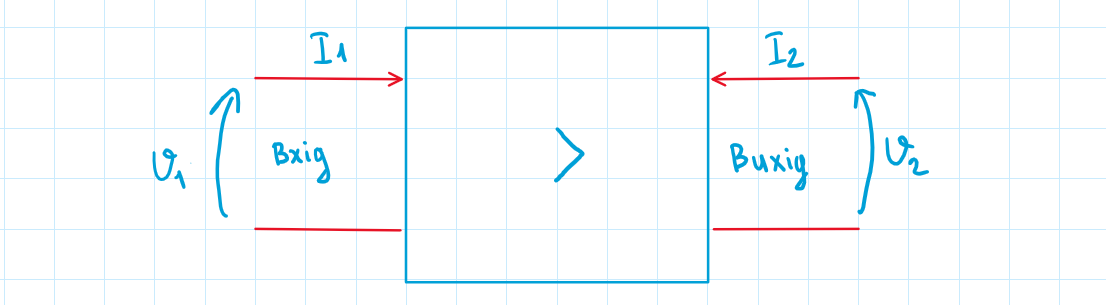

Зручно представляти ЧП у вигляді Y-параметрів (провідність). ЧП через Y-параметри описуватиметься такою системою рівнянь:

$$
\left\{ 
    \begin{array}{l}
        I_{1} = Y_{11} \cdot V_{1} + Y_{21} \cdot V_{2} &\\
        I_{2} = Y_{21} \cdot V_{1} + Y_{22} \cdot V_{2}
    \end{array} 
\right.
$$

Розглянемо режим короткого замикання на виході, коли $V_{2}=0$, тоді: 

$Y_{11} = \cfrac{I_{1}}{V_{1}}$ - вхідна провідність ЧП; 

$Y_{21} = \cfrac{I_{2}}{V_{1}}$ - пряма провідність або крутизна передачі ЧП. 
                            
Якщо $V_{1}=0$, тоді:

$Y_{12} = \cfrac{I_{1}}{V_{2}}$ - зворотна провідність, характеризує передачу сигналу з виходу на вхід, чим цей параметр менший, тим кращий підсилювач; 
     
$Y_{22} = \cfrac{I_{2}}{V_{2}}$ - вихідна провідність підсилювача.
                                          
У реальному підсилювачі на виході ЧП присутнє джерело сигналу з певною внутрішньою провідністю. А на виході ЧП присутня провідність навантаження, тому параметри підсилювача залежатимуть не тільки від параметрів ЧП, а й від параметрів навантаження і джерела сигналу.

#### Основні параметри підсилювача

$K_{v} = \cfrac{V_{2}}{V_{1}}$ - коефіцієнт посилення за напругою;

$K_{i} = \cfrac{I_{2}}{I_{1}}$ - коефіцієнт посилення за струмом;

$K_{p} = K_{u} \cdot K_{i}$ - коефіцієнт посилення за потужністю.
                                            

### Частотні характеристики підсилювача 

Частотні характеристики, що показують залежність параметрів підсилювача від частоти, це комплексні функції від аргументу $j\omega$.
    Найчастіше розглядають залежність коефіцієнта підсилення від частоти.
                            
$$K (j \omega) = K (\omega) e^{j\varphi(\omega)} $$

де
                                                  
$K(\omega)$ - модуль частотної характеристики або амплітудно-частотна характеристика **АЧХ**;
    
$\varphi(\omega)$ - фазочастотна характеристика **ФЧХ**. 


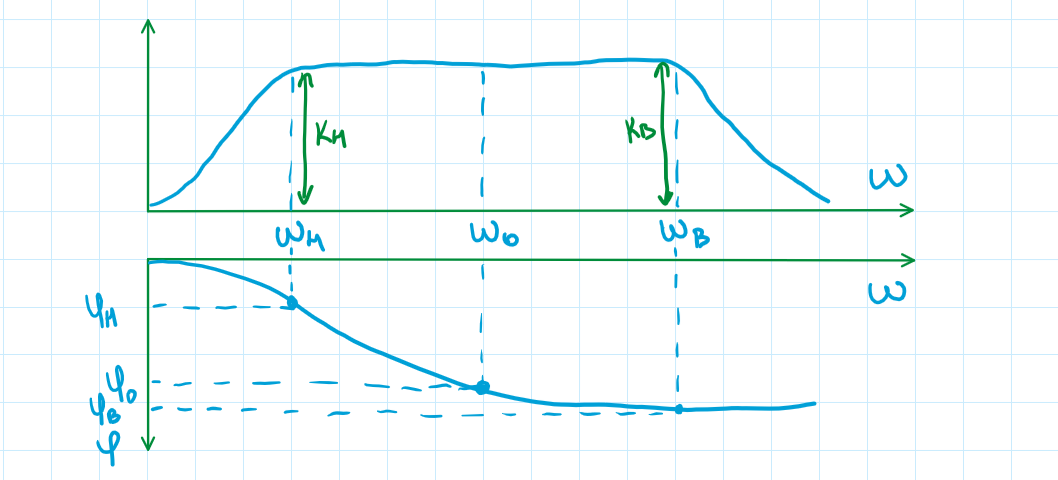

<center> Рисунок 4 </center>

   АЧХ характеризується набором параметрів:  

   $К_{о}$ - коефіцієнт передачі в смузі пропускання або на середній частоті;
   
   $К_{н}$, $К_{в}$- відповідно коефіцієнти передачі на частотах $\omega_{н}$, $\omega_{в}$;
   
   $\varphi_{н}$, $\varphi_{0}$, $\varphi_{в}$ - фазові зсуви на нижній, верхній і середній частоті.  

$М_{н} = \cfrac{K_{н}}{K_{0}}$ - коефіцієнт частотних спотворень на низькій частоті; 
   
$М_{в} = \cfrac{K_{в}}{K_{0}}$ - коефіцієнт частотних спотворень на верхній частоті.

Часто коефіцієнти $М_{в}$ і $М_{н}$, і самі коефіцієнти передачі виражають у логарифмічному масштабі:

$$М_{н,в}(дБ) = 20 \cdot lg М_{н,в}$$

$$М_{н} = М_{в} =  \cfrac{1}{\sqrt{2}} = -3 дБ$$


Тоді частоти $\omega_{н}$ і $\omega_{в}$ прийнято називати частотами зрізу.

Під час графічної побудови АЧХ її наводять у логарифмічному масштабі. По осі посилення відкладають дБ, а по осі частот відкладають логарифми частот (рисунок 7). Часто АЧХ наводять у півлогарифмічному масштабі, тоді за віссю посилення відкладають звичайні значення, а за віссю частот - у вигляді логарифмів частот (рисунок 8).


### Амплітудні характеристики

Амплітудні характеристики показують залежність між вхідним і вихідним сигналом. 
   
   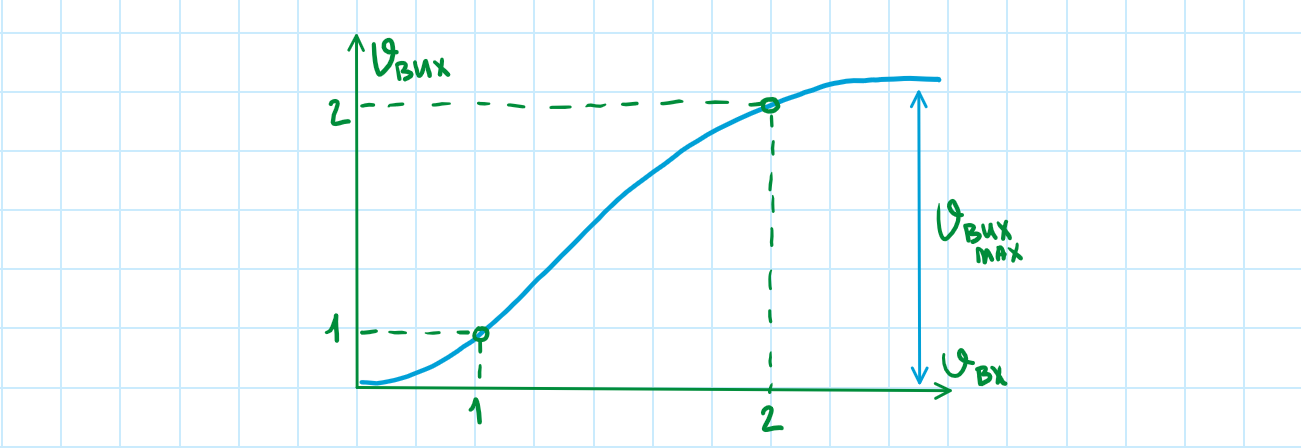   

   
Під час $U_{вх} = 0$ на виході спостерігаються шуми $U_{ш}$, а при $U_{вх}\rightarrow\infty$,  спостерігається $V_{вих.max}$ - це пояснюється можливістю підсилювача видавати неохідну амплітуду, що, своєю чергою, пояснюється обмеженням за джерелом живлення. Чим більша температура підсилювача, тим більший шум.
   
Основною робочою ділянкою характеристики є лінійна ділянка, чим більша протяжність цієї ділянки, тим краща якість підсилювача. Ця якість визначається динамічним діапазоном D: 

$$  К_{г} = \cfrac{V_{вх2}}{V_{вх1}} = \cfrac{V_{вих2}}{V_{вих1}} $$

Де 

$U_{вх2}$ і $U_{вих2}$ - максимально можливі напруги

$U_{вх1}$ і $U_{вих1}$ - мінімально можливі напруги. 

Часто динамічний діапазон визначають за формулою: 

Для оцінки лінійності підсилювача використовують коефіцієнт нелінійних викривлень (**коефіцієнт гармонік**). Що менший цей коефіцієнт, то кращий і лінійніший підсилювач. Коефіцієнт гармонік можна отримати або аналізуючи амплітудну характеристику (не дає точного результату), або методом вимірювання за допомогою приладу. У цьому разі на вхід підсилювача подають синусоїдальний сигнал із певною частотою, а на виході вимірюють амплітуди гармонік, які тому з'явилися. Тоді коефіцієнт гармонік ($К_{г}$) описується формулою: 

$$  К_{г} = \cfrac{\sqrt{
\sum_{i=2}^{n}{V_{i}^2}
}}{
V_{1}
} $$

В ідеалі $n \rightarrow \infty$, а в реальних випадках **n** обмежується якоюсь величиною (найчастіше $5,7...10$). Якщо $К_{г}$ малий, то можна користуватися спрощеною формулою: 
  
$$  К_{г} = \cfrac{\sqrt{
V_{2}^2 + V_{3}^2 + V_{4}^2 + ... 
}}{V_{1}}
 $$
   
   Ця формула справедлива якщо $К_{г}<10$

$К_{г}$ для синусоїдальних сигналів можна визначити графічним методом: 

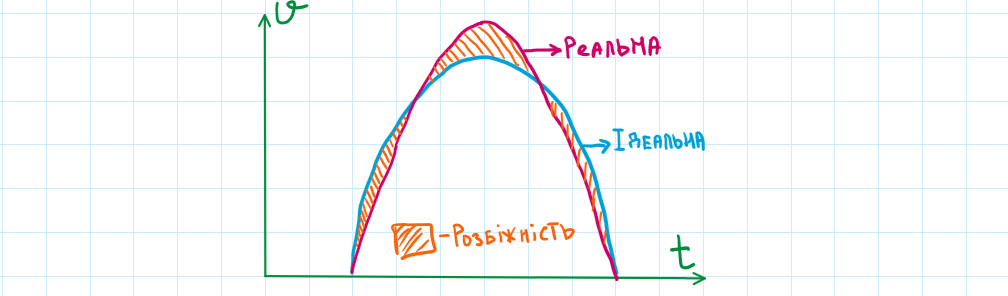

$$К_г = \cfrac{S_{н}}{S_{sin}} $$

де $S_{н}$ - площа розбіжностей (заштрихована), а $S_{sin}$ - площа ідеальної синусоїди. 

Крім $К_{г}$ для аналізу якості лінійності підсилювача вводиться поняття-інтермодуляційний коефіцієнт або коефіцієнт різницевого тону ($К_{рт}$).

$(n\cdot1000 \pm m\cdot400)$, де $n$, $m$ - будь-які цілі числа.

$$  К_{рт} = 100 \cdot \cfrac{\sqrt{
\sum_{n,m}^{N}{V_{n,m}^2}
}}{\sqrt{
V_{1}^2 + V_{2}^2
}} $$

$К_{рт}$ буде вищим, чим вища нелінійність вихідного підсилювача.

$V_{1}$, $V_{2}$ - амплітуди основних гормонік на виході;

$V^{2}n,m$ - сума квадратів усіх різницевих частот ($n$, $m$ - від **1** до **$\infty$**).

### Перешкоди та шуми

Усі їх можна розділити на дві групи:
- від зовнішніх джерел;
- і від самого підсилювача.

  Шумові властивості будь-якого підсилювального пристрою характеризуються **наведеним до входу шумом**: 

$$V_{ш0} = \cfrac{V_{ш.вих}}{K_{0}} $$

де $V_{ш.вих}$ - напруга шумів на виході підсилювача. 

Що більше $V_{ш0}$, то гіршим буде підсилювач. Шум знижує мінімальну чутливість підсилювача і звужує динамічний діапазон посилення. 
  
  **Коефіцієнт шуму** - відношення шуму на виході пристрою до відношення шумового $V$ ідеального підсилювача.
  
  $$ F_{Ш} = 20 \cdot log\cfrac{V_{ш.вих.р.}}{V_{ш.вих.ід.}} $$

У реальних підсилювачах замість окремо динамічних спотворень коефіцієнт шуму використовують відношення сигналу і шуму: 

$$\cfrac{Сигнал}{Шум} = 20 \cdot log\cfrac{V_{вих.max}}{V_{ш.max}} $$
  
$V_{вых.max.}$ - амплітудне значення корисного сигналу на виході підсилювача;
  
$V_{ш.max.}$ - амплітудне значення шумової складової на виході підсилювача.

Це відношення характеризує динамічний діапазон і шумові властивості.

**Основні шуми в підсилювачах** - це шуми польових транзисторів, а до шумів від зовнішніх джерел належать:
    
1. імпульсні перешкоди;
1. радіопередавальні високочастотні пристрої;
1. дрейф нуля (з плином часу нульова напруга на виході може змінити своє місце розташування, це може призвести до того, що вихідний сигнал почне не симетрично обмежуватися).


### Енергетичні характеристики підсилювача

До енергетичних характеристик підсилювачів належать споживана потужність 
$Р_{пот}$, вихідна потужність або потужність на навантаженні $Р_{н}$ і $ККД$.
Часто наводять різні $Р_{н}$:
    
1. **номінальна вихідна потужність** - це потужність, за якої підсилювач може працювати без зниження своїх параметрів досить довгий час
1. **максимальна вихідна потужність** - вона більша за номінальну. Вона показує ту потужність, за якої пристрій зберігає працездатність протягом певного часу
1. **пікова потужність** - це максимальна потужність, яку може розвинути пристрій протягом дуже короткого часу без виходу з ладу

$$ \eta = \cfrac{P_{вих.ном}}{P_{вх}} \cdot 100 \% $$

На ККД сильно впливає **режим роботи** вихідного підсилювача

- **У режимі А**: підсилювальний каскад підсилює весь вхідний сигнал ($ \eta < 50 %$), оскільки каскад працює на лінійній ділянці, то буде низький коефіцієнт гаримонік ($0.1...0.01$).


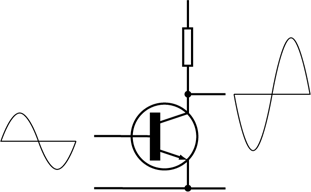
 
- **Режим В**: ($ \eta > 50 \%$ до $75 \%$), підсилює тільки одну напівхвилю сигналу. Вхідні каскади тільки двотактні, тому дуже великі спотворення. Коефіцієнт гармонік $3...5\%$.

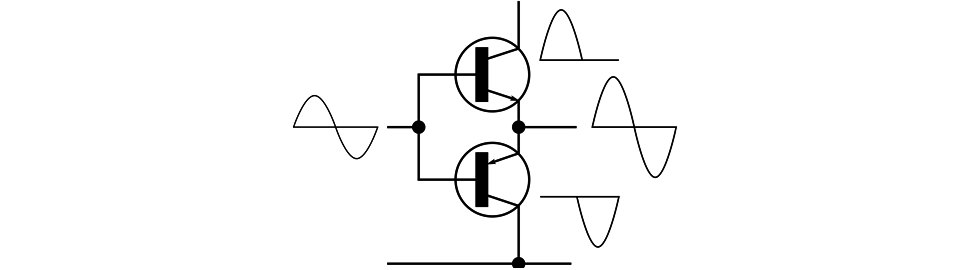

- **Проміжний режим АВ**: ($ \eta \approx 50 \%$), підсилює тільки одну півхвилю і частково другу півхвилю. Коефіцієнт гармонік трохи більший, ніж в підсилювачах класу А. За малих рівнів сигналу в двотактних схемах працює ніби в режимі А, а за більших рівнів сигналу - в режимі В.
 
 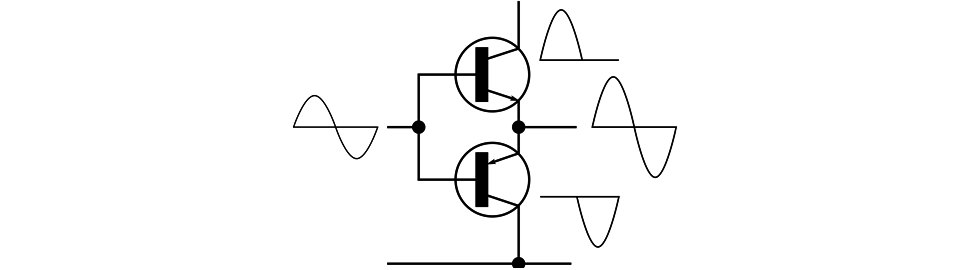
 
- **Режим С**: підсилювач підсилює тільки частину синусоїди, менше половини хвилі, це забезпечується за рахунок подачі негативного зміщення на вихідний каскад. ($ \eta <90 %$), коефіцієнт гармонік великий, тому використовуються тільки з резонансними контурами, у передавальній апаратурі.

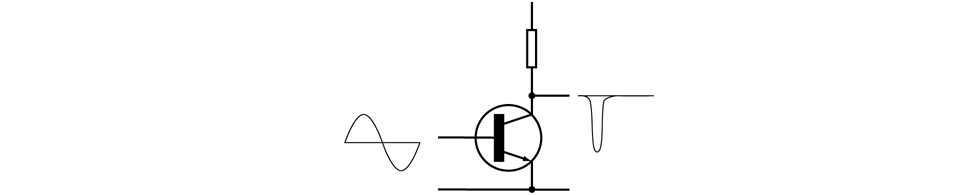
 
- **Режим Д**: імпульсні підсилювачі, процес посилення відбувається в кілька етапів. На початку вхідний сигнал за допомогою ШІМ перетворюється в прямокутні імпульси, які передаються на ключовий елемент для збільшення потужності цих імпульсів. Потім проводять фільтрацію високочастотної складової й отримують корисний сигнал. 

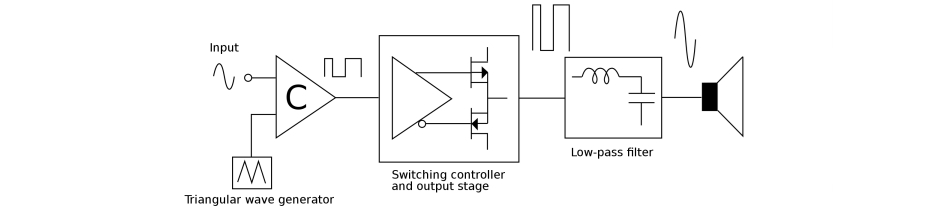

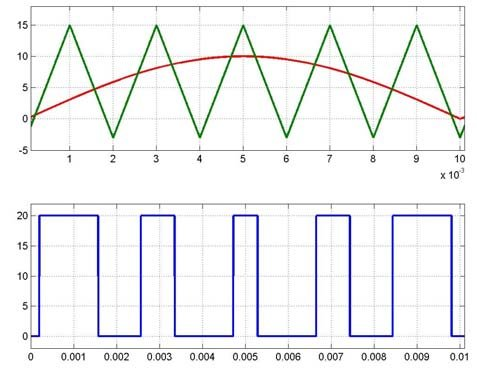

### Імпульсні та перехідні характеристики підсилювача

Це міра якості підсилювачів імпульсних сигналів або широкосмуговий підсилювач. Вони показують реакцію підсилювача на вхідний імпульсний сигнал, використовуючи як ідеальний імпульс дельта-функцію (рисунок 12). А реально використовують одиничний стрибок посилення (рисунок 13).

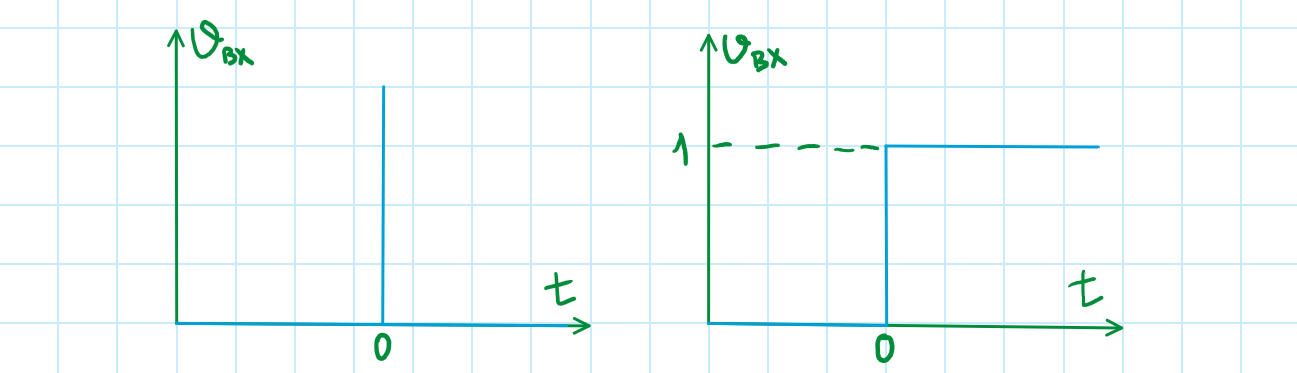

Зазвичай реакцію на вході нормують. Нормування полягає в тому, що вихідний сигнал ділять на $К_{о}$ (коефіцієнт посилення в сталому режимі).
Перехідну характеристику можна отримати аналітично, якщо записати передавальну функцію нашого підсилювача. Наведемо діаграму на виході підсилювача під час подачі на вхід одиничного сигналу (рисунок 14).

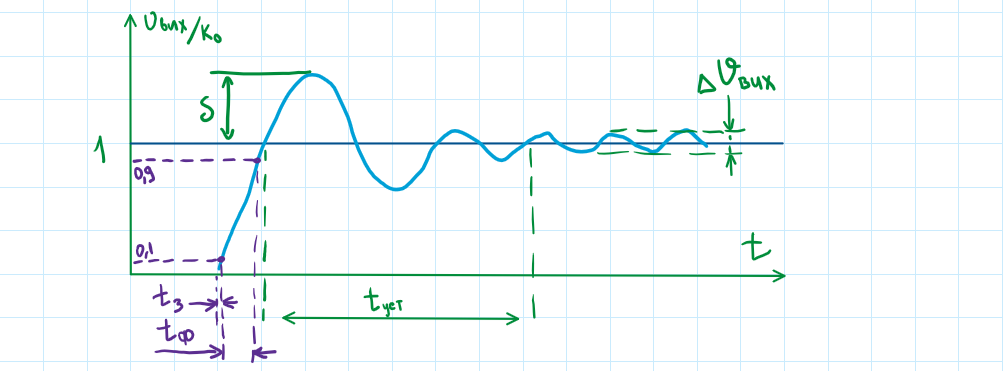
  
У нульовий момент часу на вхід підсилювача надходить одиничний стрибок напруги, у результаті на виході сигнал виникає не відразу, а в момент часу $t_{з}$ (час затримки, $0...0.1$). Після починається формування $t_{ф}$ (тривалість  $0.1...0.9$). Після досягнення одиничного значення може спостерігатися перший викид ($\delta$). З моменту **0.9** до часу встановлення сигналу в певних рівнях, тобто до $\Delta U_{вих}$ у нас формується час встановлення реакції до заданого рівня ($t_{уст}$). Усі характеристики $t_{ф}$, $t_{з}$, $t_{уст}$ - є імпульсними характеристиками підсилювача.
  
  Перехідна характеристика і коефіцієнт посилення підсилювача пов'язані:
                   $К(j \omega)=K(p)$, де $р = j \omega$ і $\cfrac{1}{р}$-зображення одиничного стрибка.

### Параметри багатокаскадних підсилювачів

$$K_{заг} = K_{1} \cdot K_{2} \cdot ... \cdot K_{N}$$

1) Сумарну АЧХ багатокаскадного пристрою можна отримати в логарифмічному масштабі, тобто підсумовуванням АЧХ окремих каскадів. Наведений до входу шум можна визначити за формулою:
      
\begin{equation*}
V_{ш0} = \cfrac{V_{ш1}\prod_{i=1}^{n} K_{i} + V_{ш2}\prod_{i=2}^{n} K_{i} + ...}{K_{заг}}
\end{equation*}

Максимальний внесок у посилення вносить перший каскад, якщо $К_{1} >> 1$, то отримуємо:

$$ V_{ш0} \approx V_{ш1} $$

2) ФЧХ для багаточастотних підсилювачів = сумі фазових зсувів усіх каскадів.

$$\varphi_{заг}(f) = \sum_{i=1}^{n} \varphi_{i}(f)$$

3) Коефіцієнт гармонік дорівнює середньоквадратичній сумі всіх гармонік

$$ K_{г.заг} = \sqrt{ \sum_{i=1}^{n} K_{г.заг}^2 } $$

4) Загальний динамічний діапазон


Звідси видно, що динамічний діапазон каскадів визначатиметься каскадом із меншим динамічним діапазоном. 


## **Розділ 2** - Зворотний зв'язок в підсилювачах

  Зворотний зв'язок є основним засобом поліпшення параметрів підсилювача. При цьому поліпшення одних параметрів відбувається завдяки погіршенню інших параметрів, менш важливих у цей момент.
   
  ЗЗ здійснюється подачею частини Uвих на вхід підсилювача. Якщо в результаті на вході відбувається додавання вхідного сигналу з сигналом ОС, то говорять про позитивний зворотний зв'язок (ПЗЗ).
   
   При ПОЗ потужність вихідного сигналу збільшується. Якщо сигнал ОС віднімається від вхідного - це негативний зворотний зв'язок (ЗЗЗ).
   
   При ООС відбувається зменшення вихідної потужності. 
  
  "+" ОЗЗ - підвищення стабільності параметрів підсилювача, під час дії різних збурювальних чинників.

### Основне рівняння ЗЗ

$$ К_{ос}= \cfrac{V_{н}}{V_{с}} $$

$$ \beta = \cfrac{V_{1}}{V_{н}} $$

$$ К = \cfrac{V_{н}}{V_{2}} $$

$$U_{2}=U_{с} \cdot U_{1}$$

$$ \cfrac{V_{н}}{К}= V_{с} + \beta \cdot V_{н}$$

Обидві частини цієї формули розділимо на $V_{с}$ і отримаємо:

$$ \cfrac{K_{ос}}{К}= 1 + \beta \cdot K_{ос}$$

Перетворюючи отримаємо:

$$ K_{ос} = \cfrac{K}{1 - \beta \cdot K} $$

$К_{ос}$ - коефіцієнт посилення підсилювача з ОС;

$\beta$ - коефіцієнт посилення підсилювача ОС з виходу на вхід;

$К$ - коефіцієнт посилення підсилювача без ОС;

$U_{с}=U_{вх}$ - вхідний сигнал;

$U_{н}=U_{вих}$ - вихідний сигнал.

Основне рівняння ОС дає змогу оцінити кількісні зміни параметрів після введення ОС. Прийнято добуток $\betaК$ називати петльовим посиленням підсилювача з ЗЗ. А величину $(1-\betaК) = F$ - фактором ОС або глибиною ОС, він показує, у скільки разів змінюється коефіцієнт підсилення після введення ОС.


$1+\beta K$ = НЗЗ (негативний зворотний зв'язок)

$1-\beta K$ = ПЗЗ (позитивний зворотний зв'язок)

За ПЗЗ $F<1$, але більше за 0. У граничному випадку, коли $ \betaК=1 \Rightarrow К_{ос}\rightarrow \infty $ і схема входить у коливальний або тригерний режим роботи. При ПОС $ К_{ос} > К $.

У разі НЗЗ $|F|>1$, а якщо $F>1$ только у разі $ \betaК < 0$. Вектори $V_{1}$ і $V_{с}$ повинні мати зсув на $180^\circ$ тобто бути в протифазі. Найчастіше потрібний фазовий зсув забезпечується за рахунок основного підсилювача К (його роблять інвентуючим), а підсилювач $\ beta$ виконують у вигляді ланки без інвентування.
- Інвентування - зміна фази.                                          
У реальних підсилювачах фазовий зсув залежить від частоти, при цьому ЗЗ на одних частотах може бути позитивним, а на інших частотах негативним і навпаки.


### Типи зворотного зв'язку

Підсилювачі $К$ і $\beta$ у загальному випадку є багатополбсниками (ЧП), тому вони можуть з'єднуватися між собою різними 4-ма способами.


Паралельне з'єднання за входом Паралельне з'єднання за входом 
за напругою (тип Y) за струмом (тип К)

Послідовне з'єднання за виходом Послідовне з'єднання за                                                 
 за напругою (тип H) виходу за струмом (тип Z)

 Зворотний зв'язок паралельний за входом, якщо джерело сигналу вмикається паралельно до виходу підсилювача ОС і подається на вхід основного підсилювача (підсумовування струму).

ОС послідовний за входом - , якщо джерело сигналу включено послідовно з вихідним підсилювачем. Відбувається підсумовування напруги.

ОС за напругою на виході - тип h і Y . Як вхідний сигнал для підсилювача  використовується вихідний сигнал підсилювача К. (опір Zн.). Все: вихід К вхід  і Zн включаються паралельно.

ОС за струмом на виході - Тип К і Z . Вхідний сигнал - струм, що протікає в Zн.
Глибина ОС в розглянутих підсилювачах буде визначаться не тільки коефіцієнтом  і К , але і параметрами Zc і Zн .

   При послідовній ОС для отримання максимальної глибини необхідно щоб ZС  0 .
   
   При паралельній ОС для отримання максимальної глибини Zс  
    (джерело струму на вході )
    
  Для зворотного зв'язку за напругою максимальна глибина буде досягнута за Zн   , ООС за струмом відсутня, оскільки Iвых = 0.
  
Для ОЗЗ за струмом максимальна глибина буде за Zн  0 , ОЗЗ за напругою вимикається , тому що Uвых = 0 .

Вплив ООС на коефіцієнт передачі. Вхідні та вихідні опори підсилювача.

   Вплив ООС різний для різних типів ОС.
   
  Паралельні ООС не впливають на коефіцієнт підсилення за напругою, і зменшують коефіцієнт підсилення за струмом.

   За ОС Y-типу Uс- вхідна напруга для підсилювача К
   
   Послідовна ОС навпаки зменшують коефіцієнт посилення за напругою і не впливають на коефіцієнт посилення за струмом.
   
  Послідовні ОС збільшують вхідний опір .
   Паралельні ОС зменшують Rвх 


H-тип ООС найкращий, найгіршим - К-тип. ООС Y і Z-типу - займають проміжне значення.

    ООС за напругою прагне підтримувати постійною напругу на виході підсилювача. Такий тип ОС буде зменшувати вихідне R підсилювача.
   ООС за струмом прагне підтримувати Iвих, тому даний тип ОС збільшує Rвих.
    Для кількісного врахування дії ООС на параметри підсилювача можна скористатися фактором ОС:
                                    F = 1-К
І залежить від номіналів резисторів цих схем.

Тут замість коефіцієнта посилення ЧП можна використовувати Кусил. реальних підсилювачів, з урахуванням впливу Rіст.і Rн.


Вплив ООС на амплітудно-частотну і фазочастотну характеристику.
Для оцінки впливу ООС на АЧХ і ФЧХ зручно використовувати приріст коефіцієнта посилення і фази від частоти до введення і після введення ОС.

  При зміні частоти відбуваються зміни Кц в підсилювачі без ОС ці зміни проявляються сильніше, ніж в підсилювачі з ОС.
   Лінійність підсилювача з ОС поліпшується.
   К = - 100 ,  = 0,2 .
Питання стабілізації можна розглянути в загальному випадку, для цього формулу для ОС продиференціюємо за частотою. 

Розділимо вихідне рівняння, отримаємо 


    Показує вплив ООС на коефіцієнт підсилення . Зміна коефіцієнта передачі підсилювача з ООС буде меншою за коефіцієнт передачі розімкненого підсилювача у фактор зворотного зв'язку в рази .
ООС на фазову характеристику впливає меншою мірою, тому на межах діапазону набіг фази може бути достатнім для зміни ООС на ПЗЗ . У результаті смуга частот підсилювача може ще більше розшириться .

### Вплив ООС на Амплітудні характеристики.

Формула для відносних прирощень для К і Кос, отриманих для ФЧХ, справедлива і в разі коливання вхідної та вихідної напруги, для амплітудної характеристики.
   Висновок: 
   
 1) Лінійність підсилювача повинна покращиться ;
                  
2) Має зменшиться вихідна шумова напруга на виході підсилювача.

3) Динамічний діапазон в підсилювачах з ОС буде ширшим ніж в підсилювачі без ОС.

    В підсилювачах з ОС наведений до входу шум залишається таким самим як і в підсилювачі без ОС, зменшується тільки амплітуда шумової напруги.
    
       З поліпшенням лінійності коефіцієнта підсилення зменшується коефіцієнт гармонік підсилювача .
       
   При Кг < 5% вихідного підсилювача :
   
  При Кг > 5% вихідного підсилювача :
  
Зменшення Кг можна досягти при введенні загальної ОС, що охоплює кілька каскадів .
   Ефективність зменшення Кг для одиночних каскадів нижча.
   
   Перехідні характеристики підсилювача при введенні ОС можуть зміниться . Найбільший вплив виявляється на час встановлення .
   
   В підсилювачах з ОС час встановлення  , одночасно збільшується і величина першого викиду.
Стійкість підсилювачів з ООС

   Оскільки коефіцієнт К і коефіцієнт  залежать від частоти, фазочастотні характеристики також залежать від f, то підсилювач з ОЗ за одних значень f може мати ОЗЗ, а за інших - ПОС, тобто мати схильність до самозбудження. Це актуально до багатокаскадних схем. Підсилювача без ОС не існує.
   
1) Критерій стійкості Найбреста: для оцінки стійкості потрібно побудувати гадограф петлевого підсилювача, так щоб гадограф не охоплював точку (1;j0).

 "-" потрібно будувати гадограф


2) Алгеброїчний критерій Гаусса-Гурвіца 

Необхідною і достатньою умовою є те, що корені полінома повинні мати від'ємні дійсні значення .

3) Достатній інженерний критерій стійкості :

   Для того щоб підсилювач був стійкий, треба щоб додатковий набіг фази в петлі ОС не перевищував /2.
   
   Нахил АЧХ не більше 20 дБ/дек ;
   
   При зміні f у 10 разів ;
   
   Стійкий підсилювач повинен бути ланкою першого порядку , який має тільки 1 корінь характеристичного рівняння .
   
   Якщо К < 1/ , то 1-К(р)(р) буде < 1.
   
   Виконання цього виразу є достатньою умовою для стійкості підсилювача .
   
   Для стійкості підсилювача достатньо, щоб пряма 1/ перетинала АЧХ підсилювача в області 20 дБ/дек .
   
   Якщо пряма 1/ перетинає АЧХ в області -60 дБ/дек - підсилювач абсолютно нестійкий .
   
   Якщо пряма 1/ перетинає АЧХ в області 40 дБ/дек - умовно стійкий .


### Стійкість двокаскадних систем
   
Кожен каскад підсилювача за напругою має тільки один полюс, спад становитиме - 20дБ/дек.

Використовують двокаскадні схеми.

Більшість сучасних операційних підсилювачів. Такі системи мають два полюси, значить умовно стійкі.

Дві корекції підсилювачів:

1) Корекція вперед;

2) Корекція назад.

При першій корекції ми повинні збільшити смугу пропускання підсилювача з більшою смугою пропускання.
  
Друга корекція полягає в погіршенні параметрів більш високоякісної ланки. Підсилювальні властивості зменшуються в 10 разів.
  
Для 3-х каскадних схем частотні властивості погіршуються в 100 разів.

   Корекція вперед не погіршує частотних властивостей.

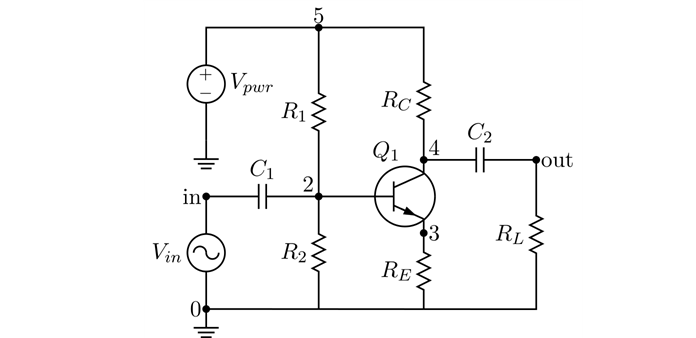


In [31]:
def g(R_1_sb, R_2_sb, R_c_sb, R_e_sb, R_l_sb, C_1_sb, C_2_sb):
    circuit = Circuit('Transistor')
    circuit.V('power', 5, circuit.gnd, 15@u_V)
    source = circuit.SinusoidalVoltageSource('in', 'in', circuit.gnd, amplitude=.5@u_V, frequency=1@u_kHz)
    circuit.C(1, 'in', 2, C_1_sb@u_uF)
    circuit.R(1, 5, 2, R_1_sb@u_kΩ)
    circuit.R(2, 2, 0, R_2_sb@u_kΩ)
    circuit.R('C', 5, 4, R_c_sb@u_kΩ)
    circuit.BJT(1, 4, 2, 3, model='bjt') # Q is mapped to BJT !
    circuit.model('bjt', 'npn', bf=80, cjc=pico(5), rb=100)
    circuit.R('E', 3, 0, R_e_sb@u_kΩ)
    circuit.C(2, 4, 'out', C_2_sb@u_uF)
    circuit.R('Load', 'out', 0, R_l_sb@u_MΩ)

    # .ac dec 5 10m 1G
    simulator = circuit.simulator(temperature=25, nominal_temperature=25)
    analysis = simulator.transient(step_time=source.period/200, end_time=source.period*4)
    
    figure, axe = plt.subplots(figsize=(10, 6))
    plt.title('')
    plt.xlabel('Time [s]')
    plt.ylabel('Voltage [V]')
    plt.grid()
    plot(analysis['in'], axis=axe)
    plot(analysis.out, axis=axe)
    plt.title('Підсилювач за схемою зі спільним еммітером')
    plt.xlabel('Час, [с]')
    plt.ylabel('Напруга, [В]')
    plt.legend(('Вхідний сигнал', 'Вихідний сигнал'), loc='best')

    plt.tight_layout()
    plt.show()

w = interactive(g,
                {'manual': True},
                R_1_sb=widgets.IntSlider(min=0, max=200, step=10, value=100, description = '$R_{1}, [k\Omega]$'), 
                R_2_sb=widgets.IntSlider(min=0, max=100, step=10, value=20, description = '$R_{2}, [k\Omega]$'), 
                R_c_sb=widgets.IntSlider(min=0, max=100, step=1, value=10, description = '$R_{c}, [k\Omega]$'), 
                R_e_sb=widgets.IntSlider(min=0, max=20, step=1, value=2, description = '$R_{e}, [k\Omega]$'), 
                R_l_sb=widgets.IntSlider(min=0, max=1000, step=10, value=1000, description = '$R_{l}, [k\Omega]$'), 
                C_1_sb=widgets.IntSlider(min=1, max=1000, step=10, value=10, description = '$C_{1},[mF]$'),
                C_2_sb=widgets.IntSlider(min=1, max=1000, step=10, value=10, description = '$C_{2},[mF]$'))
display(w)

interactive(children=(IntSlider(value=100, description='$R_{1}, [k\\Omega]$', max=200, step=10), IntSlider(val…

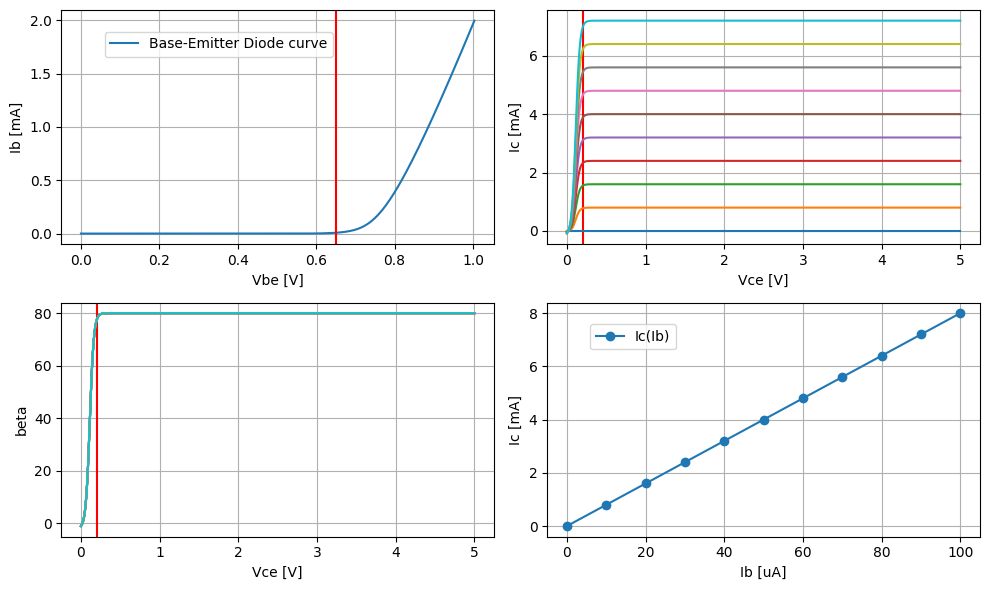

In [30]:
import numpy as np
import matplotlib.pyplot as plt


import PySpice.Logging.Logging as Logging
logger = Logging.setup_logging()


from PySpice.Doc.ExampleTools import find_libraries
from PySpice.Probe.Plot import plot
from PySpice.Spice.Library import SpiceLibrary
from PySpice.Spice.Netlist import Circuit
from PySpice.Unit import *


libraries_path = find_libraries()
spice_library = SpiceLibrary(libraries_path)


figure, ((ax1, ax2), (ax3, ax4)) = plt.subplots(2, 2, figsize=(10, 6))

circuit = Circuit('Transistor')

Vbase = circuit.V('base', '1', circuit.gnd, 1@u_V)
circuit.R('base', 1, 'base', 1@u_kΩ)
Vcollector = circuit.V('collector', '2', circuit.gnd, 0@u_V)
circuit.R('collector', 2, 'collector', 1@u_kΩ)
#circuit.include("BC556.lib")
#circuit.BJT(1, 'collector', 'base', circuit.gnd, model='BC556.lib')
circuit.BJT(1, 'collector', 'base', circuit.gnd, model='bjt') # Q is mapped to BJT !
circuit.model('bjt', 'npn', bf=80, cjc=pico(5), rb=100)

simulator = circuit.simulator(temperature=25, nominal_temperature=25)
analysis = simulator.dc(Vbase=slice(0, 3, .01))

ax1.plot(analysis.base, u_mA(-analysis.Vbase)) # Fixme: I_Vbase
ax1.axvline(x=.65, color='red')
ax1.legend(('Base-Emitter Diode curve',), loc=(.1,.8))
ax1.grid()
ax1.set_xlabel('Vbe [V]')
ax1.set_ylabel('Ib [mA]')

circuit = Circuit('Transistor')
Ibase = circuit.I('base', circuit.gnd, 'base', 10@u_uA) # take care to the orientation
Vcollector = circuit.V('collector', 'collector', circuit.gnd, 5)
#circuit.include(spice_library['2n2222a'])
#circuit.BJT(1, 'collector', 'base', circuit.gnd, model='2n2222a')
circuit.BJT(1, 'collector', 'base', circuit.gnd, model='bjt') # Q is mapped to BJT !
circuit.model('bjt', 'npn', bf=80, cjc=pico(5), rb=100)

ax2.grid()
# ax2.legend(('Ic(Vce, Ib)',), loc=(.5,.5))
ax2.set_xlabel('Vce [V]')
ax2.set_ylabel('Ic [mA]')
ax2.axvline(x=.2, color='red')

ax3.grid()
# ax3.legend(('beta(Vce)',), loc=(.5,.5))
ax3.set_xlabel('Vce [V]')
ax3.set_ylabel('beta')
ax3.axvline(x=.2, color='red')

for base_current in np.arange(0, 100, 10):
    base_current = base_current@u_uA
    Ibase.dc_value = base_current
    simulator = circuit.simulator(temperature=25, nominal_temperature=25)
    analysis = simulator.dc(Vcollector=slice(0, 5, .01))
    # add ib as text, linear and saturate region
    # Plot Ic = f(Vce)
    ax2.plot(analysis.collector, u_mA(-analysis.Vcollector))
    # Plot β = Ic / Ib = f(Vce)
    ax3.plot(analysis.collector, -analysis.Vcollector/float(base_current))
    # trans-resistance U = RI   R = U / I = Vce / Ie
    # ax3.plot(analysis.collector, analysis.sweep/(float(base_current)-analysis.Vcollector))
    # Fixme: sweep is not so explicit

ax4.grid()
ax4.set_xlabel('Ib [uA]')
ax4.set_ylabel('Ic [mA]')

simulator = circuit.simulator(temperature=25, nominal_temperature=25)
analysis = simulator.dc(Ibase=slice(0, 100e-6, 10e-6))
# Fixme: sweep
ax4.plot(analysis.sweep*1e6, u_mA(-analysis.Vcollector), 'o-')
ax4.legend(('Ic(Ib)',), loc=(.1,.8))


plt.tight_layout()
plt.show()

### Двокаскадний підсилювач за схемою СЕ-СЕ
Використовується для найбільшого підсилення за напругою 
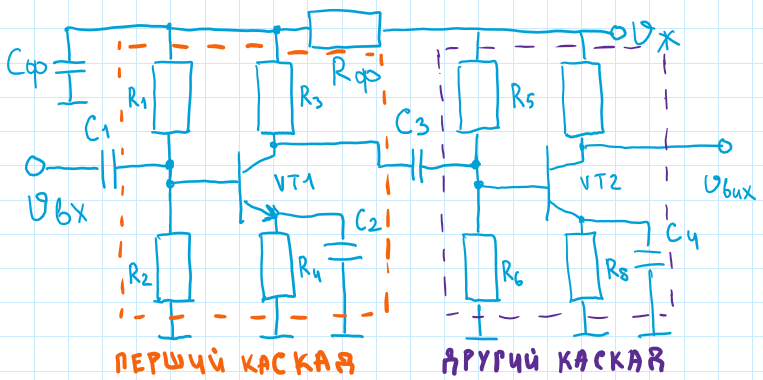

Особливістю є те що каскада за схемою з СЕ змінює фазу на 180 градусів. Два каскади мають нульову зміну фази

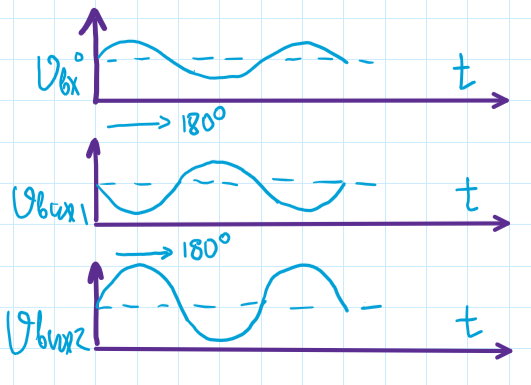

Коефіцієнт підсилення за напругою:

$$K_{all} = K_{1} \cdot K_{2} $$


### Схема Дарлінгтона

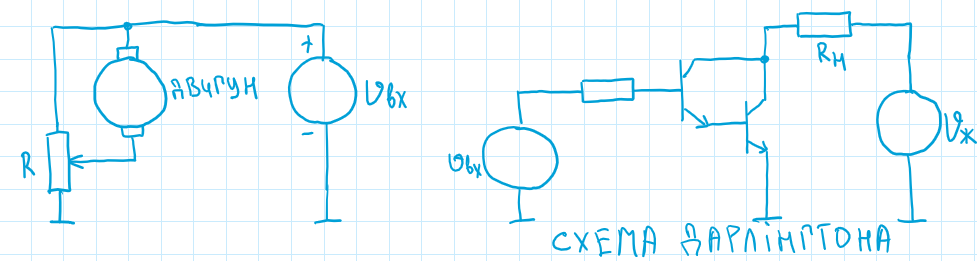



$$I_{б} = (V_{in} - 0.7V - 0.7V)/R_{b}$$

$$i_{k1} = i_{b} \cdot \beta$$

$$i_{e1} = i_{b} \cdot (\beta+1)$$

$$i_{b2} = i_{e1}$$

$$i_{k2} =\beta_{2} \cdot i_{b2}= \beta_{2} \cdot (\beta_{1} + 1) \cdot i_{b} $$

Враховуючи що $\beta_{1}$ і $\beta_{2}$ досить великі можна переписати рівняння:

$$i_{k2}  = i_{b} \cdot \beta_{1} \cdot \beta_{2}$$

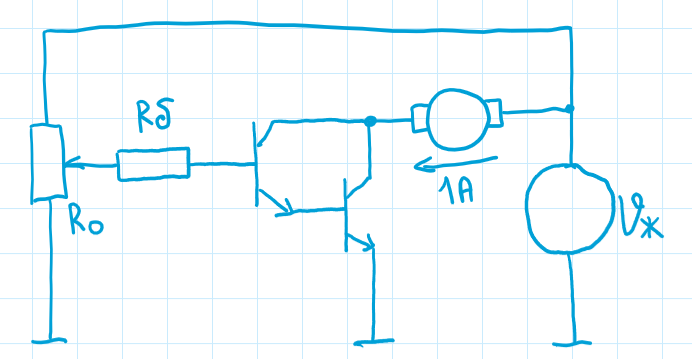


$$ i_{k2} = 1 A$$

$$\beta_{2} = 40$$

$$\beta_{1} = 80$$

$$\beta_{1} \cdot \beta_{2} = 80 \cdot 40 = 3200 \approx 3000$$

$$ i_{b} = \cfrac{1A}{3000} \approx 0.3mA $$

Для правильної роботи схеми повинні виконувати умови:


$$v_{in} > 1.4 V$$

$$v_{out} = v_{ke2} > v_{ke1} + v_{e1} = 0.4 + 0.7V \approx 1.1V$$

### Схема з транзисторами різної провідності

---
---
## Операційні підсилювачі


---
### Повторювач на операційному підсилювачі

Коефіцієнт підсилення 
$$ K_{0} = 1 $$

Вихідна напруга 
$$ V_{out} = V_{in}$$

In [37]:
def g(F_sb):
    ## Circuit Netlist
    circuit = Circuit('Op-amp circuits - Example 1 Non-inverting op-amp Amplifier')
    circuit.include("uA741.lib")
    
    # Define amplitude and frequency of input sinusoid
    amp = 0.2@u_V
    # Define transient simulation step time and stop time
    steptime = 0.1@u_us
    finaltime = 0.004
    
    source = circuit.SinusoidalVoltageSource('in', 'v+', circuit.gnd, amplitude=0.5@u_V, frequency=F_sb@u_kHz)
    
    # Power supply for the op-amp
    circuit.V(2, '+Vcc', circuit.gnd, 15@u_V)
    circuit.V(3, '-Vcc', circuit.gnd, -15@u_V)
    # Op-amp
    circuit.X(1, 'uA741', 'v+', 'v-', '+Vcc', '-Vcc', 'out')
    
    circuit.R(1, 'v-', 'out',        0@u_kΩ)
    circuit.R('L', 'out', circuit.gnd, 1000@u_kΩ)
    
    ## Simulation: Transient Analysis
    simulator = circuit.simulator(temperature=25, nominal_temperature=25)
    analysis = simulator.transient(step_time=steptime, end_time=finaltime)
    
    # PLOTTING COMMANDS
    figure, (axe1, axe2) = plt.subplots(2, 1, figsize=(10, 7))
    
    axe1.set_title('')
    axe1.set_xlabel('Час [s]')
    axe1.set_ylabel('Вхідна напруга [V]')
    axe1.grid()
    plot(analysis['v+'], axis=axe1)
    axe1.legend(('Вхід', 'Вхід'), loc=(.05, .1))
    cursor = Cursor(axe1, useblit=True, color='red', linewidth=1)
    
    axe2.set_title('')
    axe2.set_xlabel('Час [s]')
    axe2.set_ylabel('Вихідна напруга [V]')
    axe2.grid()
    plot(analysis['out'], axis=axe2)
    axe2.legend(('Вихід', 'Вихід'), loc=(.05, .1))
    cursor = Cursor(axe2, useblit=True, color='red', linewidth=1)

w = interactive(g,
                {'manual': True},
                F_sb=widgets.IntSlider(min=1, max=15, step=1, value=15, description ='$F_{вх}, [кГц]$')
               )
display(w)

interactive(children=(IntSlider(value=15, description='$F_{вх}, [кГц]$', max=15, min=1), Button(description='R…

---
### Неінвертуючий підсилювач

Вихідна напруга

$$ V_{out} = V_{in} \cdot ( 1 + \cfrac{R_{3}}{R_{2}} )$$

Вхідний імпеданс

$$ R_{in} = \infty$$

In [69]:
def g(Vin_sb, R1_sb, R2_sb, F_sb):
    ## Circuit Netlist
    circuit = Circuit('Неінвертуючий підсилювач')
    circuit.include("uA741.lib")
    
    # Define amplitude and frequency of input sinusoid
    amp = 0.2@u_V
    # Define transient simulation step time and stop time
    steptime = 0.1@u_us
    finaltime = 0.001

    source = circuit.SinusoidalVoltageSource('in', 'v+', circuit.gnd, offset=0, amplitude=Vin_sb, frequency=F_sb@u_kHz)
    #source = circuit.SinusoidalVoltageSource('in', 'in', circuit.gnd, amplitude=1@u_V, frequency=F_sb@u_kHz)

    # Power supply for the op-amp
    circuit.V(2, '+Vcc', circuit.gnd, 15@u_V)
    circuit.V(3, '-Vcc', circuit.gnd, -15@u_V)
    # Op-amp
    circuit.X(1, 'uA741', 'v+', 'v-', '+Vcc', '-Vcc', 'out')

    circuit.R(1, 'v-', circuit.gnd,  R1_sb@u_kΩ)
    circuit.R(2, 'v-', 'out',        R2_sb@u_kΩ)
    
    circuit.R('L', 'out', circuit.gnd, 1000@u_kΩ)
    
    ## Simulation: Transient Analysis
    simulator = circuit.simulator(temperature=25, nominal_temperature=25)
    analysis = simulator.transient(step_time=steptime, end_time=finaltime)
    
    # Compute FFT
    fft_out = np.fft.fft(analysis['out'])
    freqs = np.fft.fftfreq(len(analysis['out']), d=steptime)
    
    # PLOTTING COMMANDS
    figure, (axe1, axe2) = plt.subplots(2, 1, figsize=(10, 7))
        
    axe1.set_title('Неінвертуючий підсилювач на операційному підсилювачі')
    axe1.set_xlabel('Час [s]')
    axe1.set_ylabel('Вхідна напруга [V]')
    axe1.grid()
    plot(analysis['v+'], axis=axe1)
    axe1.set_ylim(-15, 15)  # Adjust limit for better visualization
    axe1.legend(('Вхід', 'Вхід'), loc=(.05, .1))
    cursor = Cursor(axe1, useblit=True, color='red', linewidth=1)
    
    axe2.set_title('')
    axe2.set_xlabel('Час [s]')
    axe2.set_ylabel('Вихідна напруга [V]')
    axe2.grid()
    plot(analysis['out'], axis=axe2)
    axe2.set_ylim(-15, 15)  # Adjust limit for better visualization
    axe2.legend(('Вихід', 'Вихід'), loc=(.05, .1))
    cursor = Cursor(axe2, useblit=True, color='red', linewidth=1)


w = interactive(g,
                {'manual': True},
                Vin_sb=widgets.FloatSlider(min=0.1, max=10, step=0.1, value=0.5, description ='$V_{in}, [V]$'),
                R1_sb=widgets.IntSlider(min=1, max=100, step=1, value=45, description ='$R_{1}, [kOhm]$'),
                R2_sb=widgets.IntSlider(min=1, max=100, step=1, value=45, description ='$R_{2}, [kOhm]$'),
                F_sb=widgets.IntSlider(min=1, max=20, step=1, value=5, description ='$F_{sw}, [kHz]$')
               )
display(w)

interactive(children=(FloatSlider(value=0.5, description='$V_{in}, [V]$', max=10.0, min=0.1), IntSlider(value=…

---
### Інвертуючий підсилювач

Вихідна напруга

$$ V_{out} = - \cfrac{R_{2}}{R_{1}} \cdot V_{in}   $$

Вхідний імпеданс

$$ R_{in} = \infty$$

In [72]:
def g(Vin_sb, R1_sb, R2_sb, F_sb):
    ## Circuit Netlist
    circuit = Circuit('Інвертуючий підсилювач')
    circuit.include("uA741.lib")
    
    # Define amplitude and frequency of input sinusoid
    amp = 0.2@u_V
    # Define transient simulation step time and stop time
    steptime = 0.1@u_us
    finaltime = 0.001

    source = circuit.SinusoidalVoltageSource('in', 'in', circuit.gnd, offset=0, amplitude=Vin_sb, frequency=F_sb@u_kHz)
    #source = circuit.SinusoidalVoltageSource('in', 'in', circuit.gnd, amplitude=1@u_V, frequency=F_sb@u_kHz)

    # Power supply for the op-amp
    circuit.V(2, '+Vcc', circuit.gnd, 15@u_V)
    circuit.V(3, '-Vcc', circuit.gnd, -15@u_V)
    # Op-amp
    circuit.X(1, 'uA741', 'v+', 'v-', '+Vcc', '-Vcc', 'out')

    circuit.R(3, 'v+', circuit.gnd, 0@u_kΩ)

    circuit.R(1, 'in', 'v-',  R1_sb@u_kΩ)
    circuit.R(2, 'v-', 'out', R2_sb@u_kΩ)
    
    circuit.R('L', 'out', circuit.gnd, 1000@u_kΩ)
    
    ## Simulation: Transient Analysis
    simulator = circuit.simulator(temperature=25, nominal_temperature=25)
    analysis = simulator.transient(step_time=steptime, end_time=finaltime)
    
    # Compute FFT
    fft_out = np.fft.fft(analysis['out'])
    freqs = np.fft.fftfreq(len(analysis['out']), d=steptime)
    
    # PLOTTING COMMANDS
    figure, (axe1, axe2) = plt.subplots(2, 1, figsize=(10, 7))
        
    axe1.set_title('Інвертуючий підсилювач на операційному підсилювачі')
    axe1.set_xlabel('Час [s]')
    axe1.set_ylabel('Вхідна напруга [V]')
    axe1.grid()
    plot(analysis['in'], axis=axe1)
    axe1.set_ylim(-15, 15)  # Adjust limit for better visualization
    axe1.legend(('Вхід', 'Вхід'), loc=(.05, .1))
    cursor = Cursor(axe1, useblit=True, color='red', linewidth=1)
    
    axe2.set_title('')
    axe2.set_xlabel('Час [s]')
    axe2.set_ylabel('Вихідна напруга [V]')
    axe2.grid()
    plot(analysis['out'], axis=axe2)
    axe2.set_ylim(-15, 15)  # Adjust limit for better visualization
    axe2.legend(('Вихід', 'Вихід'), loc=(.05, .1))
    cursor = Cursor(axe2, useblit=True, color='red', linewidth=1)


w = interactive(g,
                {'manual': True},
                Vin_sb=widgets.FloatSlider(min=0.1, max=10, step=0.1, value=0.5, description ='$V_{in}, [V]$'),
                R1_sb=widgets.IntSlider(min=1, max=100, step=1, value=45, description ='$R_{1}, [kOhm]$'),
                R2_sb=widgets.IntSlider(min=1, max=100, step=1, value=45, description ='$R_{2}, [kOhm]$'),
                F_sb=widgets.IntSlider(min=1, max=20, step=1, value=5, description ='$F_{sw}, [kHz]$')
               )
display(w)

interactive(children=(FloatSlider(value=0.5, description='$V_{in}, [V]$', max=10.0, min=0.1), IntSlider(value=…

---
### Релаксаційний генератор на операційному підсилювачі

**В електроніці** релаксаційним генератором (осцилятором) (англ. relaxation oscillator) називають нелінійний електронний генератор що генерує несинусоїдальний періодичний сигнал, такий як наприклад трикутна чи квадратна хвиля.[1][2][3][4]


$$ V_{in} = V_{out} \cdot R_{1}$$

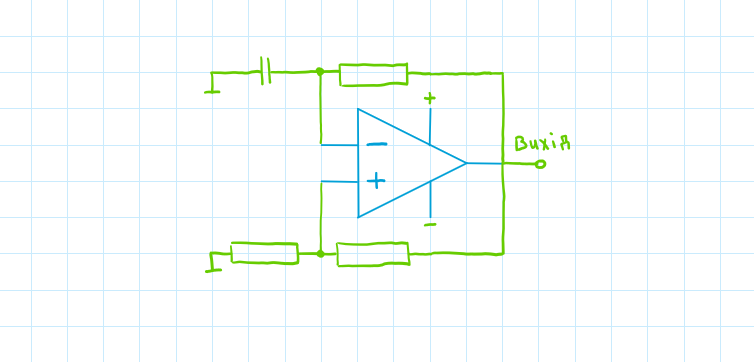

In [60]:
def g(C_sb):
    ## Circuit Netlist
    circuit = Circuit('Op-amp circuits - Example 1 Non-inverting op-amp Amplifier')
    circuit.include("uA741.lib")
    
    # Define amplitude and frequency of input sinusoid
    amp = 0.2@u_V
    # Define transient simulation step time and stop time
    steptime = 0.1@u_us
    finaltime = 0.04
    
    # Power supply for the op-amp
    circuit.V(2, '+Vcc', circuit.gnd, 15@u_V)
    circuit.V(3, '-Vcc', circuit.gnd, -15@u_V)
    # Op-amp
    circuit.X(1, 'uA741', 'v+', 'v-', '+Vcc', '-Vcc', 'out')
    
    circuit.C(1, 'v-', circuit.gnd,  C_sb@u_nF)
    circuit.R(1, 'v-', 'out',        10@u_kΩ)
    
    circuit.R(2, 'v+', 'out',         10@u_kΩ)
    circuit.R(3, 'v+', circuit.gnd,   10@u_kΩ)
    circuit.R('L', 'out', circuit.gnd, 1000@u_kΩ)
    
    ## Simulation: Transient Analysis
    simulator = circuit.simulator(temperature=25, nominal_temperature=25)
    analysis = simulator.transient(step_time=steptime, end_time=finaltime)
    
    # Compute FFT
    fft_out = np.fft.fft(analysis['out'])
    freqs = np.fft.fftfreq(len(analysis['out']), d=steptime)
    
    # PLOTTING COMMANDS
    figure, (axe1, axe2) = plt.subplots(2, 1, figsize=(10, 7))
    
    axe1.set_title('Вихідна напруга')
    axe1.set_xlabel('Час [s]')
    axe1.set_ylabel('Напруга [V]')
    axe1.grid()
    plot(analysis['out'], axis=axe1)
    axe1.legend(('Output', 'Output'), loc=(.05, .1))
    cursor = Cursor(axe1, useblit=True, color='red', linewidth=1)
    
    axe2.set_title('Спектр вихідного сигналу')
    axe2.set_xlabel('Частота [Hz]')
    axe2.set_ylabel('Magnitude')
    axe2.grid()
    axe2.plot(freqs[1:100], np.abs(fft_out[1:100]))
    axe2.set_xlim(0, 2000)  # Adjust limit for better visualization
    plt.tight_layout()
    plt.show()


w = interactive(g,
                {'manual': True},
                C_sb=widgets.IntSlider(min=1, max=100, step=1, value=45, description ='$C_{1}, [nF]$')
               )
display(w)

interactive(children=(IntSlider(value=45, description='$C_{1}, [nF]$', min=1), Button(description='Run Interac…

---
### Активний ФНЧ на операційному підсилювачі

Коефіцієнт підсилення 
$$ K_{0} = 1 + \cfrac{R_{3}}{R_{2}}$$

Частота зрізу 
$$ \omega_{0} = \cfrac{1}{R_{1} \cdot C}$$

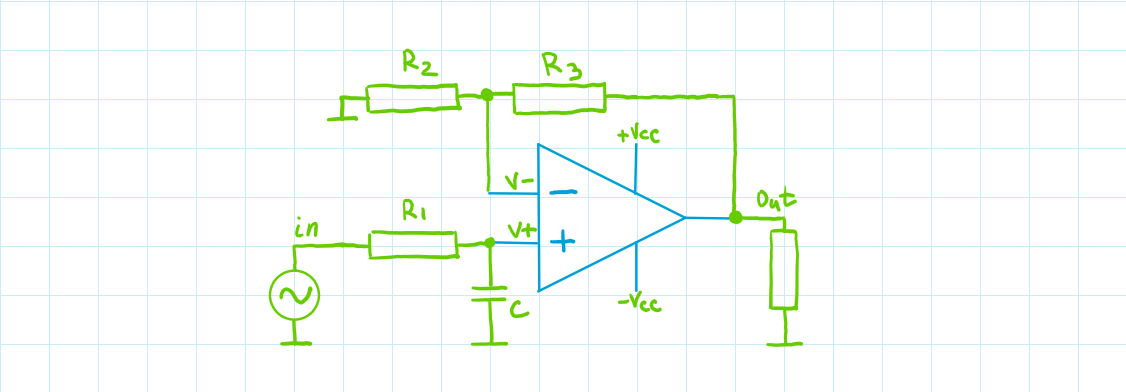

In [4]:
def g(R1_sb, R2_sb, R3_sb, C_sb, F_sb):
    ## Circuit Netlist
    circuit = Circuit('Low pass filter')
    circuit.include("uA741.lib")
    
    # Define transient simulation step time and stop time
    steptime = 0.1@u_us
    finaltime = 0.001

    circuit.SinusoidalVoltageSource('Vsin', 'in', circuit.gnd, offset=1, amplitude=0.1, frequency=F_sb@u_kHz)

    circuit.R(1, 'v+', 'in',         R1_sb@u_kΩ)
    circuit.C(1, 'v+', circuit.gnd,  C_sb@u_nF)

    # Power supply for the op-amp
    circuit.V(2, '+Vcc', circuit.gnd, 15@u_V)
    circuit.V(3, '-Vcc', circuit.gnd, -15@u_V)
    # Op-amp
    circuit.X(1, 'uA741', 'v+', 'v-', '+Vcc', '-Vcc', 'out')

    circuit.R(2, 'v-', circuit.gnd,  R2_sb@u_kΩ)
    circuit.R(3, 'v-', 'out',        R3_sb@u_kΩ)
    
    circuit.R('L', 'out', circuit.gnd, 100@u_kΩ)
    
    ## Simulation: Transient Analysis
    simulator = circuit.simulator(temperature=25, nominal_temperature=25)
    analysis = simulator.transient(step_time=steptime, end_time=finaltime)
    
    # PLOTTING COMMANDS
    figure, (axe1, axe2) = plt.subplots(2, 1, figsize=(10, 7))
        
    axe1.set_title('Активний ФНЧ на операційному підсилювачі')
    axe1.set_xlabel('Час [s]')
    axe1.set_ylabel('Вхідна напруга [V]')
    axe1.grid()
    plot(analysis['in'], axis=axe1)
    axe1.set_ylim(-1, 3)  # Adjust limit for better visualization
    axe1.legend(('Вхід', 'Вхід'), loc=(.05, .1))
    cursor = Cursor(axe1, useblit=True, color='red', linewidth=1)
    
    axe2.set_title('')
    axe2.set_xlabel('Час [s]')
    axe2.set_ylabel('Вихідна напруга [V]')
    axe2.grid()
    plot(analysis['out'], axis=axe2)
    axe2.set_ylim(-1, 3)  # Adjust limit for better visualization
    axe2.legend(('Вихід', 'Вихід'), loc=(.05, .1))
    cursor = Cursor(axe2, useblit=True, color='red', linewidth=1)


w = interactive(g,
                {'manual': True},
                R1_sb=widgets.IntSlider(min=1, max=100, step=1, value=45, description ='$R_{1}, [kOhm]$'),
                R2_sb=widgets.IntSlider(min=1, max=100, step=1, value=45, description ='$R_{2}, [kOhm]$'),
                R3_sb=widgets.IntSlider(min=1, max=100, step=1, value=45, description ='$R_{3}, [kOhm]$'),
                C_sb=widgets.IntSlider(min=1, max=100, step=1, value=45, description ='$C_{1}, [nF]$'),
                F_sb=widgets.IntSlider(min=1, max=100, step=1, value=45, description ='$F_{sw}, [kHz]$')
               )
display(w)

interactive(children=(IntSlider(value=45, description='$R_{1}, [kOhm]$', min=1), IntSlider(value=45, descripti…

---
### Активний ФВЧ на операційному підсилювачі

Коефіцієнт підсилення 
$$ K_{0} = 1 + \cfrac{R_{3}}{R_{2}}$$

Частота зрізу 
$$ \omega_{0} = \cfrac{1}{R_{1} \cdot C}$$

In [20]:
def g(R1_sb, R2_sb, R3_sb, C_sb, F_sb):
    ## Circuit Netlist
    circuit = Circuit('Op-amp circuits - Example 1 Non-inverting op-amp Amplifier')
    circuit.include("uA741.lib")
    
    # Define amplitude and frequency of input sinusoid
    amp = 0.2@u_V
    # Define transient simulation step time and stop time
    steptime = 0.1@u_us
    finaltime = 0.001

    source = circuit.SinusoidalVoltageSource('in', 'in', circuit.gnd, offset=1, amplitude=0.5, frequency=F_sb@u_kHz)
    #source = circuit.SinusoidalVoltageSource('in', 'in', circuit.gnd, amplitude=1@u_V, frequency=F_sb@u_kHz)

    circuit.R(1, 'v+', circuit.gnd, R1_sb@u_kΩ)
    circuit.C(1, 'v+', 'in',        10000@u_nF)

    # Power supply for the op-amp
    circuit.V(2, '+Vcc', circuit.gnd, 15@u_V)
    circuit.V(3, '-Vcc', circuit.gnd, -15@u_V)
    # Op-amp
    circuit.X(1, 'uA741', 'v+', 'v-', '+Vcc', '-Vcc', 'out')

    circuit.R(2, 'v-', circuit.gnd,  R2_sb@u_kΩ)
    circuit.R(3, 'v-', 'out',        R3_sb@u_kΩ)
    
    circuit.R('L', 'out', circuit.gnd, 1000@u_kΩ)
    
    ## Simulation: Transient Analysis
    simulator = circuit.simulator(temperature=25, nominal_temperature=25)
    analysis = simulator.transient(step_time=steptime, end_time=finaltime)
    
    # Compute FFT
    fft_out = np.fft.fft(analysis['out'])
    freqs = np.fft.fftfreq(len(analysis['out']), d=steptime)
    
    # PLOTTING COMMANDS
    figure, (axe1, axe2) = plt.subplots(2, 1, figsize=(10, 7))
        
    axe1.set_title('Активний ФВЧ на операційному підсилювачі')
    axe1.set_xlabel('Час [s]')
    axe1.set_ylabel('Вхідна напруга [V]')
    axe1.grid()
    plot(analysis['in'], axis=axe1)
    axe1.set_ylim(-2, 2)  # Adjust limit for better visualization
    axe1.legend(('Вхід', 'Вхід'), loc=(.05, .1))
    cursor = Cursor(axe1, useblit=True, color='red', linewidth=1)
    
    axe2.set_title('')
    axe2.set_xlabel('Час [s]')
    axe2.set_ylabel('Вихідна напруга [V]')
    axe2.grid()
    plot(analysis['out'], axis=axe2)
    axe2.set_ylim(-2, 2)  # Adjust limit for better visualization
    axe2.legend(('Вихід', 'Вихід'), loc=(.05, .1))
    cursor = Cursor(axe2, useblit=True, color='red', linewidth=1)


w = interactive(g,
                {'manual': True},
                R1_sb=widgets.IntSlider(min=1, max=100, step=1, value=45, description ='$R_{1}, [kOhm]$'),
                R2_sb=widgets.IntSlider(min=1, max=100, step=1, value=45, description ='$R_{2}, [kOhm]$'),
                R3_sb=widgets.IntSlider(min=1, max=100, step=1, value=45, description ='$R_{3}, [kOhm]$'),
                C_sb=widgets.IntSlider(min=1, max=100, step=1, value=45, description ='$C_{1}, [nF]$'),
                F_sb=widgets.IntSlider(min=1, max=100, step=1, value=45, description ='$F_{sw}, [kHz]$')
               )
display(w)

interactive(children=(IntSlider(value=45, description='$R_{1}, [kOhm]$', min=1), IntSlider(value=45, descripti…